In [19]:

import matplotlib.pyplot as plt
import numpy as np

In [20]:
from sklearn.datasets import make_classification

In [21]:
X,Y = make_classification(n_classes=2,n_samples=400,n_features=2,n_redundant=0,random_state=3,n_clusters_per_class=1)
print(X)

[[ 6.19192558e-01  8.77334604e-01]
 [ 7.92459374e-01 -1.00168920e+00]
 [ 2.88645453e-01  1.39124803e+00]
 [ 1.58096623e+00 -1.34343848e+00]
 [ 7.28615181e-01  6.72359125e-01]
 [ 2.44324896e+00 -2.17252244e+00]
 [ 9.73350687e-01 -1.20907289e+00]
 [ 7.66433953e-01  6.71150149e-01]
 [-9.31677246e-02  1.18053768e+00]
 [ 1.86027784e+00 -1.28962400e+00]
 [ 1.85632244e+00  1.29734559e+00]
 [ 1.07291752e+00 -1.03438045e+00]
 [ 2.21631713e+00 -1.32152844e+00]
 [ 8.10272562e-01  3.83582180e-01]
 [ 1.32390280e+00 -1.16158966e+00]
 [ 1.65157355e+00 -1.48863858e+00]
 [ 6.04265789e-01  8.41620246e-01]
 [ 2.76358493e-01  8.26400777e-01]
 [-1.17327261e-01  9.45569081e-01]
 [ 1.48885846e+00 -1.40785367e+00]
 [ 2.10452899e+00 -1.57637397e+00]
 [ 2.01227202e+00 -1.42309398e+00]
 [-4.13481302e-01 -6.05148192e-01]
 [ 2.35006978e+00  7.16846004e-01]
 [ 1.26460547e+00  7.87270897e-01]
 [ 2.04382768e+00  6.92510857e-01]
 [ 7.46108758e-01 -1.62074320e+00]
 [ 2.20295375e-01 -3.36804643e-01]
 [ 4.43433331e-01 -1

In [22]:

# convert into -1,1
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

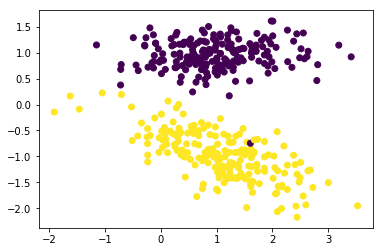

In [23]:

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [37]:
class SVM:
   
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            
            loss += self.C *max(0,(1-ti))
            print(loss)
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses        
                

In [38]:
mySVM = SVM()


In [39]:
new = new.reshape((1,1024*3))
print(new.shape)w,b,losses = mySVM.fit(X,Y,maxItr=100)
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

[[1.]]
[[2.]]
[[3.]]
[[4.]]
[[5.]]
[[6.]]
[[7.]]
[[8.]]
[[9.]]
[[10.]]
[[11.]]
[[12.]]
[[13.]]
[[14.]]
[[15.]]
[[16.]]
[[17.]]
[[18.]]
[[19.]]
[[20.]]
[[21.]]
[[22.]]
[[23.]]
[[24.]]
[[25.]]
[[26.]]
[[27.]]
[[28.]]
[[29.]]
[[30.]]
[[31.]]
[[32.]]
[[33.]]
[[34.]]
[[35.]]
[[36.]]
[[37.]]
[[38.]]
[[39.]]
[[40.]]
[[41.]]
[[42.]]
[[43.]]
[[44.]]
[[45.]]
[[46.]]
[[47.]]
[[48.]]
[[49.]]
[[50.]]
[[51.]]
[[52.]]
[[53.]]
[[54.]]
[[55.]]
[[56.]]
[[57.]]
[[58.]]
[[59.]]
[[60.]]
[[61.]]
[[62.]]
[[63.]]
[[64.]]
[[65.]]
[[66.]]
[[67.]]
[[68.]]
[[69.]]
[[70.]]
[[71.]]
[[72.]]
[[73.]]
[[74.]]
[[75.]]
[[76.]]
[[77.]]
[[78.]]
[[79.]]
[[80.]]
[[81.]]
[[82.]]
[[83.]]
[[84.]]
[[85.]]
[[86.]]
[[87.]]
[[88.]]
[[89.]]
[[90.]]
[[91.]]
[[92.]]
[[93.]]
[[94.]]
[[95.]]
[[96.]]
[[97.]]
[[98.]]
[[99.]]
[[100.]]
[[101.]]
[[102.]]
[[103.]]
[[104.]]
[[105.]]
[[106.]]
[[107.]]
[[108.]]
[[109.]]
[[110.]]
[[111.]]
[[112.]]
[[113.]]
[[114.]]
[[115.]]
[[116.]]
[[117.]]
[[118.]]
[[119.]]
[[120.]]
[[121.]]
[[122.]]
[[123.]]
[

[[0.58434108]]
[[0.64902951]]
[[0.64902951]]
[[0.64902951]]
[[0.95513045]]
[[0.95513045]]
[[0.95513045]]
[[1.26137894]]
[[1.26137894]]
[[1.26137894]]
[[1.26137894]]
[[1.30185834]]
[[1.30185834]]
[[1.88707705]]
[[1.88707705]]
[[1.88707705]]
[[2.03166218]]
[[2.2000082]]
[[2.26297916]]
[[2.26297916]]
[[2.26297916]]
[[2.26297916]]
[[2.68114595]]
[[2.8997317]]
[[3.07927718]]
[[3.32991458]]
[[3.32991458]]
[[4.02678253]]
[[4.07426028]]
[[4.37955832]]
[[4.37955832]]
[[5.16299145]]
[[5.16299145]]
[[5.21350661]]
[[5.21350661]]
[[5.22061756]]
[[5.22061756]]
[[5.22061756]]
[[5.72223197]]
[[5.72223197]]
[[5.72223197]]
[[5.91336163]]
[[6.06925133]]
[[6.57523709]]
[[6.98592473]]
[[6.98592473]]
[[7.20574264]]
[[7.48673603]]
[[7.85565198]]
[[7.85565198]]
[[7.85565198]]
[[8.15465215]]
[[8.55648925]]
[[9.0340066]]
[[9.0340066]]
[[9.31196515]]
[[9.31196515]]
[[9.32289303]]
[[9.32289303]]
[[9.32289303]]
[[9.53493796]]
[[10.16122347]]
[[10.16122347]]
[[10.17037598]]
[[10.28897417]]
[[10.28897417]]
[[10.7495

[[20.84215732]]
[[21.30851839]]
[[21.41396973]]
[[21.41396973]]
[[21.79561863]]
[[21.98272763]]
[[21.98272763]]
[[22.18953951]]
[[22.18953951]]
[[22.18953951]]
[[22.18953951]]
[[22.65834116]]
[[22.99760693]]
[[23.2911012]]
[[23.2911012]]
[[23.52492905]]
[[23.52492905]]
[[23.52492905]]
[[23.52492905]]
[[23.52492905]]
[[23.60423024]]
[[24.79415673]]
[[25.34706361]]
[[25.34706361]]
[[25.34706361]]
[[25.34706361]]
[[25.34706361]]
[[25.34706361]]
[[25.34706361]]
[[25.48809831]]
[[25.48809831]]
[[25.48809831]]
[[25.48809831]]
[[25.81728282]]
[[25.81728282]]
[[25.81728282]]
[[25.81728282]]
[[25.81728282]]
[[26.38094857]]
[[26.38094857]]
[[26.38094857]]
[[26.52175111]]
[[26.67454608]]
[[26.91028021]]
[[26.91028021]]
[[26.91028021]]
[[27.29232095]]
[[27.29232095]]
[[27.34215293]]
[[27.61699787]]
[[27.61699787]]
[[28.52952103]]
[[28.52952103]]
[[28.88710604]]
[[29.11522184]]
[[29.11522184]]
[[29.12024176]]
[[29.51504964]]
[[29.51504964]]
[[29.51504964]]
[[29.51504964]]
[[29.51504964]]
[[29.53494

[[27.8726307]]
[[27.8726307]]
[[27.8726307]]
[[27.8726307]]
[[28.14247208]]
[[28.14247208]]
[[28.14247208]]
[[28.34497915]]
[[28.79952818]]
[[28.85432397]]
[[28.85432397]]
[[28.85432397]]
[[28.85432397]]
[[28.85432397]]
[[29.1879377]]
[[29.1879377]]
[[29.1879377]]
[[29.1879377]]
[[29.79894019]]
[[29.79894019]]
[[29.79894019]]
[[29.87366823]]
[[29.87366823]]
[[29.87366823]]
[[29.87366823]]
[[30.1672773]]
[[30.1672773]]
[[30.1672773]]
[[30.1672773]]
[[30.1672773]]
[[30.1672773]]
[[30.61621037]]
[[30.64949289]]
[[30.64949289]]
[[30.64949289]]
[[30.64949289]]
[[30.88094959]]
[[30.88094959]]
[[31.4253595]]
[[31.4253595]]
[[31.4253595]]
[[32.13990057]]
[[32.13990057]]
[[32.13990057]]
[[32.13990057]]
[[32.13990057]]
[[32.13990057]]
[[32.13990057]]
[[32.13990057]]
[[32.13990057]]
[[32.21989495]]
[[32.21989495]]
[[32.21989495]]
[[32.44749049]]
[[32.44749049]]
[[32.51498114]]
[[32.95265705]]
[[32.95265705]]
[[34.02781808]]
[[34.13314819]]
[[34.13314819]]
[[34.13314819]]
[[34.13314819]]
[[34.1331

[[2.9214776]]
[[3.08729113]]
[[3.14445998]]
[[3.14445998]]
[[3.14445998]]
[[3.17081883]]
[[3.17081883]]
[[3.17081883]]
[[3.17081883]]
[[3.25087095]]
[[3.25087095]]
[[3.38205943]]
[[3.38205943]]
[[3.38205943]]
[[3.38205943]]
[[3.38205943]]
[[3.38205943]]
[[3.38205943]]
[[3.38205943]]
[[3.7244714]]
[[3.7244714]]
[[3.7244714]]
[[3.7244714]]
[[3.7244714]]
[[3.8443198]]
[[3.8443198]]
[[3.8443198]]
[[3.8443198]]
[[3.8443198]]
[[3.8443198]]
[[3.8443198]]
[[4.1637614]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.39300186]]
[[4.43671407]]
[[4.43671407]]
[[4.43671407]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[4.73704152]]
[[5.3334363]]
[[5.3334363]]
[[5.3334363]]
[[5.3334363]]
[[5.3334363]]

[[5.26944388]]
[[5.26944388]]
[[5.26944388]]
[[5.26944388]]
[[5.26944388]]
[[5.26944388]]
[[5.48018376]]
[[5.48018376]]
[[5.48018376]]
[[6.47652919]]
[[6.47652919]]
[[7.38885965]]
[[7.38885965]]
[[7.38885965]]
[[7.38885965]]
[[7.38885965]]
[[7.66134]]
[[7.66134]]
[[7.66134]]
[[7.71300827]]
[[8.22401369]]
[[8.22401369]]
[[8.22401369]]
[[8.31255328]]
[[8.31255328]]
[[8.63816759]]
[[8.63816759]]
[[9.44991488]]
[[9.44991488]]
[[9.44991488]]
[[9.44991488]]
[[9.44991488]]
[[9.44991488]]
[[9.44991488]]
[[9.44991488]]
[[10.59064136]]
[[10.59064136]]
[[10.61893502]]
[[10.61893502]]
[[10.61893502]]
[[10.80736757]]
[[11.44932678]]
[[11.44932678]]
[[11.44932678]]
[[12.14893859]]
[[12.18311354]]
[[12.18311354]]
[[12.24547099]]
[[12.24547099]]
[[12.24547099]]
[[12.24547099]]
[[12.24547099]]
[[12.24547099]]
[[12.24547099]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12.87839875]]
[[12

[[18.56617453]]
[[18.56617453]]
[[18.56617453]]
[[18.56617453]]
[[18.56617453]]
[[18.56617453]]
[[18.56617453]]
[[18.61523227]]
[[18.61523227]]
[[18.61523227]]
[[18.76346617]]
[[19.19509542]]
[[19.19509542]]
[[19.19509542]]
[[19.19509542]]
[[19.19509542]]
[[19.19509542]]
[[19.30680763]]
[[19.30680763]]
[[19.30680763]]
[[19.30680763]]
[[19.75181291]]
[[19.75181291]]
[[19.75181291]]
[[19.75181291]]
[[19.75181291]]
[[19.75181291]]
[[19.75181291]]
[[19.82490056]]
[[19.82490056]]
[[19.82490056]]
[[19.82490056]]
[[19.82490056]]
[[19.82490056]]
[[20.10115538]]
[[20.10115538]]
[[20.10115538]]
[[20.10115538]]
[[20.10115538]]
[[20.25216671]]
[[20.25216671]]
[[20.63658224]]
[[20.63658224]]
[[20.63658224]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.20762161]]
[[21.2253753]]
[[21.2253753]]
[[21.2253753]]
[[21.49937295]]
[[21.49937295]]
[[22.46335148]]
[[22.491915

[[22.21879982]]
[[22.21879982]]
[[22.21879982]]
[[22.21879982]]
[[22.21879982]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.33625763]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[1.78672912]]
[[2.09308248]]
[[2.09308248]]
[[2.09308248]]
[[2.09308248]]
[[2.6039308]]
[[2.6039308]]
[[2.6039308]]
[[2.6039308]]
[[2.6039308]]
[[2.6039308]]
[[2.6039308]]
[[2.66727684]]
[[2.66727684]]
[[2.66727684]]
[[2.66727684]]
[[2.66727684]]
[[2.68240991]]
[[2.68240991]]
[[2.68240991]]
[[2.68240991]]
[[2.68240991]]
[[2.68240991]]
[[2.68240991]]
[[2.68240991]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.72019738]]
[[2.93137033

[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.79497386]]
[[10.89517735]]
[[10.89517735]]
[[10.89517735]]
[[10.89517735]]
[[10.89517735]]
[[10.89517735]]
[[10.90981547]]
[[10.90981547]]
[[10.90981547]]
[[10.90981547]]
[[10.99715285]]
[[11.21426265]]
[[11.21426265]]
[[11.21426265]]
[[11.27595972]]
[[11.27595972]]
[[11.27595972]]
[[11.27595972]]
[[11.27595972]]
[[11.27595972]]
[[12.31801896]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.49671758]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.76463807]]
[[12.764

[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.10132784]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.23156155]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[3.90489369]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.28602866]]
[[4.47920206]]
[[4.47920206]]
[[4.47920206]]
[[5.4051633]]
[[5.4051633]]
[[6.24789246]]
[[6.24789246

[[10.10454917]]
[[10.10454917]]
[[10.10454917]]
[[10.10454917]]
[[10.10454917]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.14548153]]
[[10.16681113]]
[[10.36422315]]
[[10.36422315]]
[[10.36422315]]
[[10.39634589]]
[[10.39634589]]
[[10.39634589]]
[[10.39634589]]
[[10.39634589]]
[[10.39634589]]
[[11.39417097]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.50094466]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[11.72898619]]
[[12.34103304]]
[[12.34103304]]
[[12.34103304]]
[[12.34103304]]
[[12.34103304]]
[[12.34103304]]
[[12.34103304]]
[[12.341

[[17.91635753]]
[[17.91635753]]
[[17.91635753]]
[[18.65131739]]
[[18.90599754]]
[[18.90599754]]
[[18.90599754]]
[[18.90599754]]
[[18.90599754]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.56317048]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[1.98766149]]
[[2.19389918]]
[[2.19389918]]
[[2.19389918]]
[[2.19389918]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.66051729]]
[[2.68385973]]
[[2.68385973]]
[[2.68385973]]
[[2.68385973]]
[[2.68385973]]
[[2.68385973]]
[

[[2.69797999]]
[[2.69797999]]
[[2.69797999]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.81241463]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[2.95403414]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.03855121]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[3.74696808]]
[[4.10891003]]
[[4.10891003]]
[[4.10891003]]
[[4.10891003]]
[[4.10891003]]
[[4.108910

[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.4669388]]
[[15.63474629]]
[[15.63474629]]
[[15.63474629]]
[[15.63474629]]
[[15.63474629]]
[[15.67634706]]
[[15.67634706]]
[[15.94679778]]
[[15.94679778]]
[[15.94679778]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.37095158]]
[[16.57682127]]
[[16.57682127]]
[[17.31415663]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17.31783609]]
[[17

[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[2.9971031]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[3.71864641]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.06582283]]
[[4.24181308]]
[[4.24181308]]
[[4.24181308]]
[[5.13332896]]
[[5.13332896]]
[[5.94503053]]
[[5.94503053]]
[[5.94503053]]
[[5.94503053]]
[[5.94503053]]
[[6.1562272]]
[[6.1562272]]
[[6.1562272]]
[[6.1562272]]
[[6.24920797]]
[[6.24920797]]
[[6.24920797]]
[[6.24920797]]
[[6.24920797]]
[[6.39143534]]
[[6.39143534]]
[[7.07887848]]

[[13.52140838]]
[[13.52140838]]
[[13.52140838]]
[[13.52140838]]
[[13.52140838]]
[[13.52140838]]
[[13.53036215]]
[[13.53036215]]
[[13.53036215]]
[[13.53036215]]
[[13.53036215]]
[[13.53036215]]
[[13.53036215]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.71245221]]
[[13.80055621]]
[[14.02594349]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.18762562]]
[[14.34307109]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.750042]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9930939]]
[[14.9

[[14.80990954]]
[[14.80990954]]
[[14.80990954]]
[[14.80990954]]
[[14.80990954]]
[[14.80990954]]
[[14.80990954]]
[[14.80990954]]
[[14.9660354]]
[[14.9660354]]
[[14.9660354]]
[[14.9660354]]
[[14.9660354]]
[[14.96765527]]
[[14.96765527]]
[[15.22246755]]
[[15.22246755]]
[[15.22246755]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.61558337]]
[[15.82458195]]
[[15.82458195]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002]]
[[16.49463002

[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74025606]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.74482984]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.81945122]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.88119769]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[2.9339296]]
[[3.68462035]]
[[3.684620

[[10.2834914]]
[[10.2834914]]
[[10.2834914]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78594295]]
[[10.78720042]]
[[13.07516757]]
[[13.07516757]]
[[13.07516757]]
[[13.07516757]]
[[13.07516757]]
[[13.07516757]]
[[13.07516757]]
[[13.07516757]]
[[13.09320867]]
[[13.09320867]]
[[13.09320867]]
[[13.09320867]]
[[13.09320867]]
[[13.09320867]]
[[13.09320867]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.28858057]]
[[13.35052206]]
[[13.59289655]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145]]
[[13.7182145

[[12.96489903]]
[[12.96489903]]
[[12.96489903]]
[[12.96489903]]
[[12.96489903]]
[[12.98343982]]
[[12.98343982]]
[[12.98343982]]
[[12.98343982]]
[[12.98343982]]
[[12.98343982]]
[[12.98343982]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.18074507]]
[[13.236032]]
[[13.47775317]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.59450768]]
[[13.75525261]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.15358481]]
[[14.35007592]]
[[14.35007592]]
[[14.35007592]]
[[14.35007592]]
[[14.35007592]]
[[14.35007592]]
[[14.35007592]]
[[14.35007592]]
[[14.35007592]]
[[14.35007

[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.85080169]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[2.88009853]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.65160754]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[3.97590346]]
[[4.14653755]]
[[4.14653755]]
[[4.14653755]]
[[5.0051082]]
[[5.0051082]]
[[5.78791622]]
[[5.78791622

[[3.64537194]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[3.97047055]]
[[4.14332499]]
[[4.14332499]]
[[4.14332499]]
[[4.99598923]]
[[4.99598923]]
[[5.77320051]]
[[5.77320051]]
[[5.77320051]]
[[5.77320051]]
[[5.77320051]]
[[5.9671783]]
[[5.9671783]]
[[5.9671783]]
[[5.9671783]]
[[5.9671783]]
[[5.9671783]]
[[5.9671783]]
[[5.9671783]]
[[5.9671783]]
[[6.05336843]]
[[6.05336843]]
[[6.69822569]]
[[6.69822569]]
[[6.69822569]]
[[6.69822569]]
[[6.69822569]]
[[6.69822569]]
[[6.69822569]]
[[6.69822569]]
[[7.54547404]]
[[7.54547404]]
[[7.54547404]]
[[7.54547404]]
[[7.54547404]]
[[7.54547404]]
[[7.99712217]]
[[7.99712217]]
[[7.99712217]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.69412457]]
[[8.84025576]]
[[8.

[[13.90155784]]
[[13.90155784]]
[[13.90155784]]
[[13.90155784]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.06755265]]
[[14.18890877]]
[[14.18890877]]
[[14.18890877]]
[[14.18890877]]
[[14.18890877]]
[[14.18890877]]
[[14.18890877]]
[[14.40493633]]
[[14.40493633]]
[[14.40493633]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.74191319]]
[[14.93413961]]
[[14.93413961]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.50685631]]
[[15.506

[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.64371075]]
[[14.83218394]]
[[14.83218394]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[15.39345628]]
[[16.06154773]]
[[16.23996956]]
[[16.23996956]]
[[16.23996956]]
[[16.23996956]]
[[16.23996956]]
[[1.88403498]]
[[1.88403498]]
[[1.88403498]]
[[1.88403498]]
[[1.88403498

[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[2.82222453]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.6200338]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[3.94278461]]
[[4.1173559]]
[[4.1173559]]
[[4.1173559]]
[[4.95392353]]
[[4.95392353]]
[[5.71580875]]
[[5.71580875]]
[[5.71580875]]
[[5.71580875]]
[[5.71580875]]
[[5.90810453

[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.60931889]]
[[8.7233904]]
[[8.7233904]]
[[8.7233904]]
[[8.7233904]]
[[8.7233904]]
[[8.7233904]]
[[8.7233904]]
[[8.7233904]]
[[8.7233904]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.57073937]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[9.70937414]]
[[10.14255809]]
[[10.14255809]]
[[10.14255809]]
[[10.14255809]]


[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.04728108]]
[[15.71131467]]
[[15.88326487]]
[[15.88326487]]
[[15.88326487]]
[[15.88326487]]
[[15.88326487]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[1.93848827]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.29814536]]
[[2.36741989]]
[[2.36741989]]
[[2.36741989]]
[[2.36741989]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381646]]
[[2.80381

[[8.45867774]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.52267121]]
[[8.63568796]]
[[8.63568796]]
[[8.63568796]]
[[8.63568796]]
[[8.63568796]]
[[8.63568796]]
[[8.63568796]]
[[8.63568796]]
[[8.63568796]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.46736445]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[9.59353441]]
[[10.00867373]]
[[10.00867373]]
[[10.008

[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[2.82027216]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.64071709]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[3.95709029]]
[[4.13163523]]
[[4.13163523]]
[[4.13163523]]
[[4.95120504]]
[[4.95120504]]
[[5.69746409]]
[[5.69746409]]
[[5.69746409]]
[[5.69746409]]
[[5.69746409]]
[[5.88480474]]
[[5.88480474]]
[[5.88480474]]
[[5.884804

[[1.99013534]]
[[1.99013534]]
[[1.99013534]]
[[1.99013534]]
[[1.99013534]]
[[1.99013534]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.3442593]]
[[2.39404206]]
[[2.39404206]]
[[2.39404206]]
[[2.39404206]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.8231296]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]
[[2.82480675]]

[[14.05617524]]
[[14.05617524]]
[[14.05617524]]
[[14.22787673]]
[[14.22787673]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[14.71174054]]
[[15.36772939]]
[[15.52928792]]
[[15.52928792]]
[[15.52928792]]
[[15.52928792]]
[[15.52928792]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.00173062]]
[[2.35505358]]
[[2.35505358]]
[[2.35505358]]
[[2.35505358]]
[[2.35505

[[12.46985952]]
[[12.46985952]]
[[12.46985952]]
[[12.46985952]]
[[12.49106978]]
[[12.7240799]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.79008763]]
[[12.97258582]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.37536234]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.47246817]]
[[13.55469668]]
[[13.55469668]]
[[13.55469668]]
[[13.55469668]]
[[13.55469668]]
[[13.55469668]]
[[13.55469668]]
[[13.72795671]]
[[13.72795671]]
[[13.72795671]]
[[14.00597849]]
[[14.00597849]]
[[14.00597849]]
[[14.00597849]]
[[14.0059

[[12.43905958]]
[[12.43905958]]
[[12.43905958]]
[[12.43905958]]
[[12.43905958]]
[[12.43905958]]
[[12.43905958]]
[[12.45857592]]
[[12.69174887]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.75492612]]
[[12.93930492]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.3426525]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.43402181]]
[[13.51321456]]
[[13.51321456]]
[[13.51321456]]
[[13.51321456]]
[[13.51321456]]
[[13.51321456]]
[[13.51321456]]
[[13.68305401]]
[[13.68305401]]
[[13.68305401]]
[[13.95612714]]
[[13.95612714]]
[[

[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[14.53351545]]
[[15.18670034]]
[[15.34473233]]
[[15.34473233]]
[[15.34473233]]
[[15.34473233]]
[[15.34473233]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.03617731]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.38743684]]
[[2.4170024]]
[[2.4170024]]
[[2.4170024]]
[[2.4170024]]
[[2.83846438]]
[[2.83846438

[[7.64098209]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.3457528]]
[[8.4438546]]
[[8.4438546]]
[[8.4438546]]
[[8.4438546]]
[[8.4438546]]
[[8.4438546]]
[[8.4438546]]
[[8.4438546]]
[[8.4438546]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.23931537]]
[[9.34185077]]
[[9.34185077]]
[[9.34185077]]
[[9.34185077]]
[[9.34185077]]
[[9.34185077]]
[[9.34185077]]
[[9.34185077]]
[[9.3418

[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[2.85012909]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[3.69455117]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.00595413]]
[[4.1810898]]
[[4.1810898]]
[[4.1810898]]
[[4.98089861]]
[[4.98089861]]
[[5.70846632]]
[[5.70846632]]
[[5.70846632]]
[[5.70846632]]
[[5.70846632]

[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.32362962]]
[[14.9765763]]
[[15.13001292]]
[[15.13001292]]
[[15.13001292]]
[[15.13001292]]
[[15.13001292]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.08183608]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.43096213]]
[[2.44409317]]
[[2.44409317]]
[[2.44409317]]
[[2.44409317]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.85439019]]
[[2.8

[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.29736962]]
[[8.39344091]]
[[8.39344091]]
[[8.39344091]]
[[8.39344091]]
[[8.39344091]]
[[8.39344091]]
[[8.39344091]]
[[8.39344091]]
[[8.39344091]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.18063669]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.26791646]]
[[9.267916

[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[2.86279464]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[3.71337383]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.02234956]]
[[4.19551808]]
[[4.19551808]]
[[4.19551808]]
[[4.98826085]]
[[4.98826085]]
[[5.70862169]]
[[5.70862169]]
[[5.70862169]]
[[5.708621

[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.18574106]]
[[14.83535703]]
[[14.98325027]]
[[14.98325027]]
[[14.98325027]]
[[14.98325027]]
[[14.98325027]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.11547645]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46039728]]
[[2.46205362]]
[[2.46205362]]
[[2.46205362]]
[[2.46205362]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[2.86845547]]
[[

In [28]:
print(w)
print(b)
print(losses)

[[-0.32123293 -2.03495023]]
0.38800000000000023
[400.0, 250.83335455242548, 120.66987199872277, 70.67978006061685, 53.162832148595996, 44.670031163975956, 39.4864617383243, 35.80231689005122, 32.887024310883675, 30.52482184491803, 28.654090720875736, 27.1402029939348, 25.882214611020466, 24.76525310063127, 23.76672597199541, 22.920123274125643, 22.23132451793649, 21.740017607521196, 21.313862406028118, 20.942004746513057, 20.593267821980064, 20.28475750121329, 20.01626708966456, 19.802418243839803, 19.58606916093652, 19.370502125812077, 19.15910497341845, 18.945189724597963, 18.76281619601966, 18.60107032541793, 18.444610021308325, 18.286342813267478, 18.145425621168556, 18.016478817449148, 17.89029368948603, 17.767002440828236, 17.64390258963487, 17.52531729803666, 17.408185945655156, 17.302198912515045, 17.211657557180082, 17.123737694583088, 17.042635701214678, 16.976541590254268, 16.915838097363547, 16.85024990349799, 16.790408840733107, 16.726370067409462, 16.667160371281387, 16.6

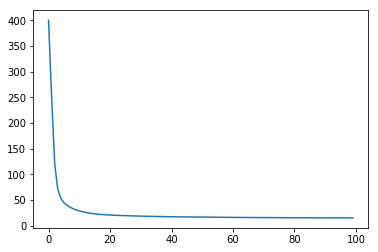

[[-0.32123293 -2.03495023]] 0.38800000000000023


In [29]:
plt.plot(losses)
plt.show()
W,B = mySVM.W,mySVM.b
print(W,B)

In [30]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2 #WT +B=0
    xp = -(w1*x1+b+1)/w2 #WT +B=-1
    xn = -(w1*x1+b-1)/w2 #WT +B=1
    plt.plot(x1,x2,label = "HyperPlane WX+B=0")
    plt.plot(x1,xp,label = "HyperPlane WX+B=1")
    plt.plot(x1,xn,label = "HyperPlane WX+B=-1")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    

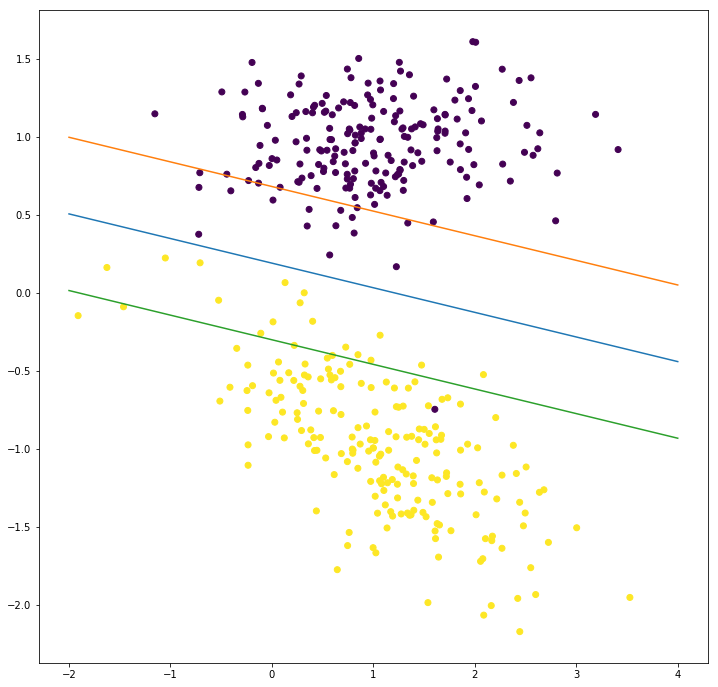

In [31]:
plotHyperplane(W[0,0],W[0,1],B)

In [36]:
#effect of change in C -penalty constant
type(X[0])

numpy.ndarray